## About dataset

BIMaster - Network Intrusion Detection

BI-DM: Predict types of connection attempts (normal or attack) in a military environment.

Network intrusion detection software protects a computer network from unotherized users, including insiders. The intrusion detector's learning task is to build a predictive model (that is, a classifier) capable of distinguishing between 'bad' connections, called intrusions or attacks, and normal connections.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import training data

In [2]:
df_train = pd.read_csv(r"C:\Users\dell\Downloads\treino.csv")
df_train.head()

,id,protocol_type,flag,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,out
0,1,icmp,SF,1032,0,511,511,0.0,0.0,0.0,0.0,0.00,0.00,1.00,0.0,0.0,0.0,smurf.
1,2,tcp,SF,204,1,17,17,0.0,0.0,0.0,0.0,0.00,0.00,0.02,0.0,0.0,0.0,normal.
2,3,tcp,S0,0,0,250,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,1.0,1.0,0.0,neptune.
3,4,icmp,SF,520,0,511,511,0.0,0.0,0.0,0.0,0.00,0.00,1.00,0.0,0.0,0.0,smurf.
4,5,icmp,SF,1032,0,511,511,0.0,0.0,0.0,0.0,0.00,0.00,1.00,0.0,0.0,0.0,smurf.


## Exploring training data

In [3]:
df_train.shape

(48473, 18)

In [4]:
df_train.size

872514

In [5]:
df_train.describe()

,id,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
count,48473.000000,4.847300e+04,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000,48473.000000
mean,24237.000000,8.578620e+02,0.144060,337.287954,298.960163,0.178226,0.178302,0.051710,0.051837,0.017668,0.025555,0.606397,0.178332,0.178170,0.052231
std,13993.094136,2.013502e+04,0.351154,211.219908,245.428253,0.382464,0.382426,0.221307,0.221249,0.059902,0.085519,0.480827,0.382455,0.382421,0.220699
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12119.000000,1.050000e+02,0.000000,123.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24237.000000,5.470000e+02,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,36355.000000,1.032000e+03,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,1.000000,0.000000,0.000000,0.000000
max,48473.000000,2.194619e+06,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.930000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48473 entries, 0 to 48472
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           48473 non-null  int64  
 1   protocol_type                48473 non-null  object 
 2   flag                         48473 non-null  object 
 3   src_bytes                    48473 non-null  int64  
 4   logged_in                    48473 non-null  int64  
 5   count                        48473 non-null  int64  
 6   srv_count                    48473 non-null  int64  
 7   serror_rate                  48473 non-null  float64
 8   srv_serror_rate              48473 non-null  float64
 9   rerror_rate                  48473 non-null  float64
 10  srv_rerror_rate              48473 non-null  float64
 11  diff_srv_rate                48473 non-null  float64
 12  dst_host_diff_srv_rate       48473 non-null  float64
 13  dst_host_same_sr

In [7]:
#checking null values
df_train.isnull().sum()

id                             0
protocol_type                  0
flag                           0
src_bytes                      0
logged_in                      0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
diff_srv_rate                  0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
out                            0
dtype: int64

In [8]:
#checking duplicate values
df_train.duplicated().sum()

0

In [9]:
for col in df_train.columns[1:]:
    print(df_train[col].value_counts())

icmp    28249
tcp     18288
udp      1936
Name: protocol_type, dtype: int64
SF      37330
S0       8631
REJ      2459
RSTO       48
S1          5
Name: flag, dtype: int64
1032    22965
0       11146
520      5160
105       744
147       268
        ...  
1686        1
747         1
1940        1
2016        1
506         1
Name: src_bytes, Length: 1208, dtype: int64
0    41490
1     6983
Name: logged_in, dtype: int64
511    22787
1       3586
510     2713
2        945
3        540
       ...  
433        1
387        1
355        1
430        1
305        1
Name: count, Length: 399, dtype: int64
511    22732
1       3285
510     2753
2       1742
3       1025
       ...  
302        1
232        1
210        1
118        1
305        1
Name: srv_count, Length: 289, dtype: int64
0.00    39776
1.00     8592
0.99       27
0.05       11
0.50        9
0.03        9
0.33        6
0.07        5
0.98        4
0.10        4
0.20        4
0.14        4
0.25        4
0.17        3
0.06        3
0

### Observations:
There are nearly 48,500 rows and 18 columns in the training dataset. Most of the columns have numeric dtype. Three columns, namely, "protocol_type", "flag" and "out" are categorical in nature. There are neither missing values nor duplicate values in given data. Here, "out" is the target variable.

## Training data preprocessing 

### 1. Changing categorical columns into numerical dtype using replace() function

In [10]:
#protocol_type
df_train['protocol_type'].replace('icmp',0, inplace = True)
df_train['protocol_type'].replace('tcp',1, inplace = True)
df_train['protocol_type'].replace('udp',2, inplace = True)

#flag
df_train['flag'].replace('SF',0, inplace = True)
df_train['flag'].replace('S0',1, inplace = True)
df_train['flag'].replace('REJ',2, inplace = True)
df_train['flag'].replace('RSTO',3, inplace = True)
df_train['flag'].replace('S1',4, inplace = True)

#out
df_train['out'].replace('smurf.',0, inplace = True)
df_train['out'].replace('neptune.',1, inplace = True)
df_train['out'].replace('normal.',2, inplace = True)

df_train.head(3)

,id,protocol_type,flag,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,out
0,1,0,0,1032,0,511,511,0.0,0.0,0.0,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0
1,2,1,0,204,1,17,17,0.0,0.0,0.0,0.0,0.00,0.00,0.02,0.0,0.0,0.0,2
2,3,1,1,0,0,250,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,1.0,1.0,0.0,1


### 2. Removing unnecessary columns

In [11]:
del df_train["id"]
df_train.head(2)

,protocol_type,flag,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,out
0,0,0,1032,0,511,511,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0
1,1,0,204,1,17,17,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,2


## Data Vizualization

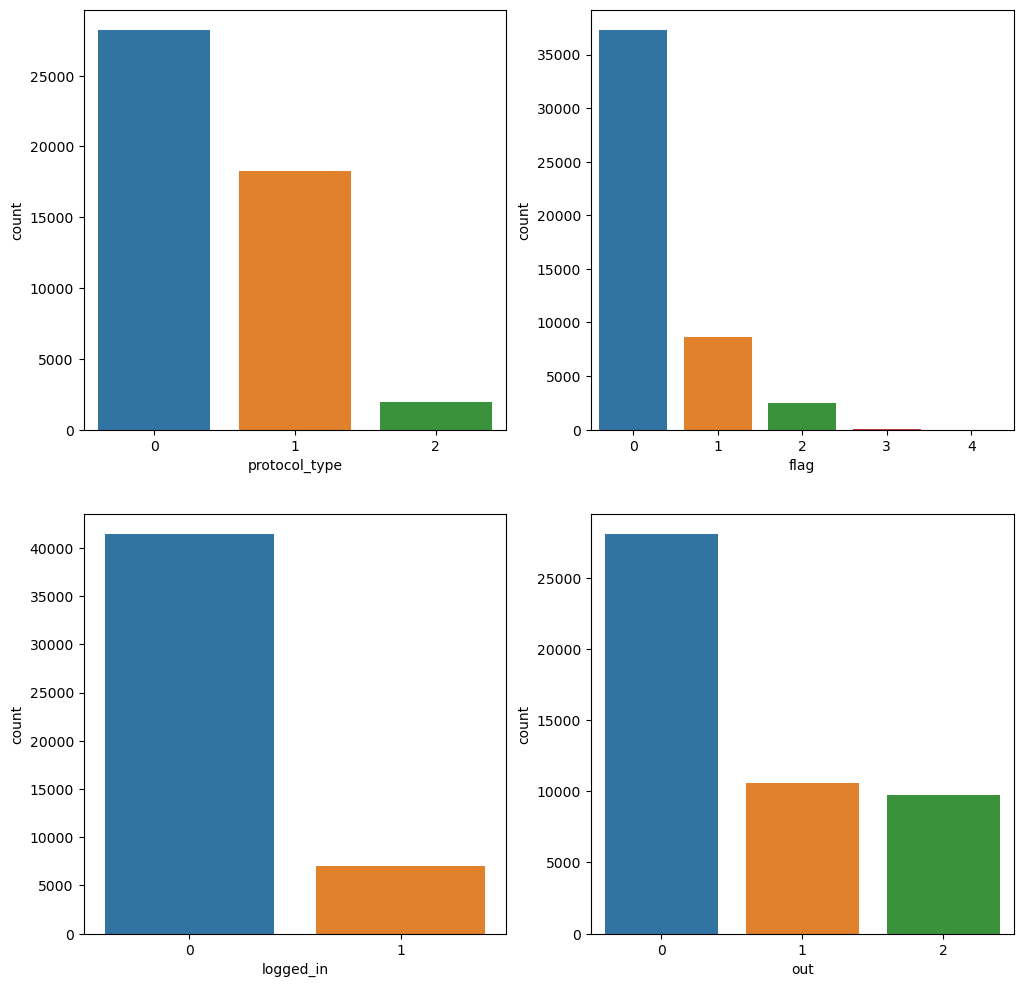

In [12]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(df_train['protocol_type'])

plt.subplot(2,2,2)
sns.countplot(df_train['flag'])

plt.subplot(2,2,3)
sns.countplot(df_train['logged_in'])

plt.subplot(2,2,4)
sns.countplot(df_train['out'])

plt.show()

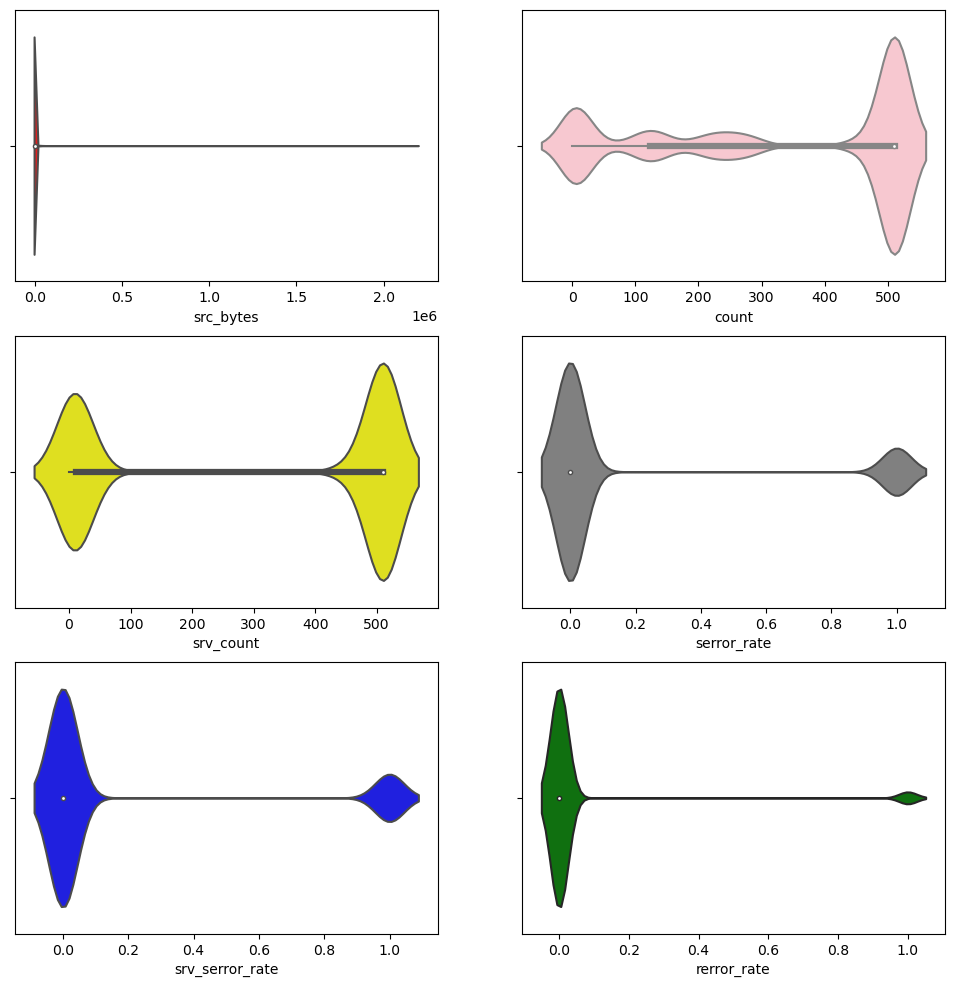

In [13]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.violinplot(df_train['src_bytes'], color = "red")

plt.subplot(3,2,2)
sns.violinplot(df_train['count'], color = "pink")

plt.subplot(3,2,3)
sns.violinplot(df_train['srv_count'], color = "yellow")

plt.subplot(3,2,4)
sns.violinplot(df_train['serror_rate'], color = "gray")

plt.subplot(3,2,5)
sns.violinplot(df_train['srv_serror_rate'], color = "blue")

plt.subplot(3,2,6)
sns.violinplot(df_train['rerror_rate'], color = "green")

plt.show()

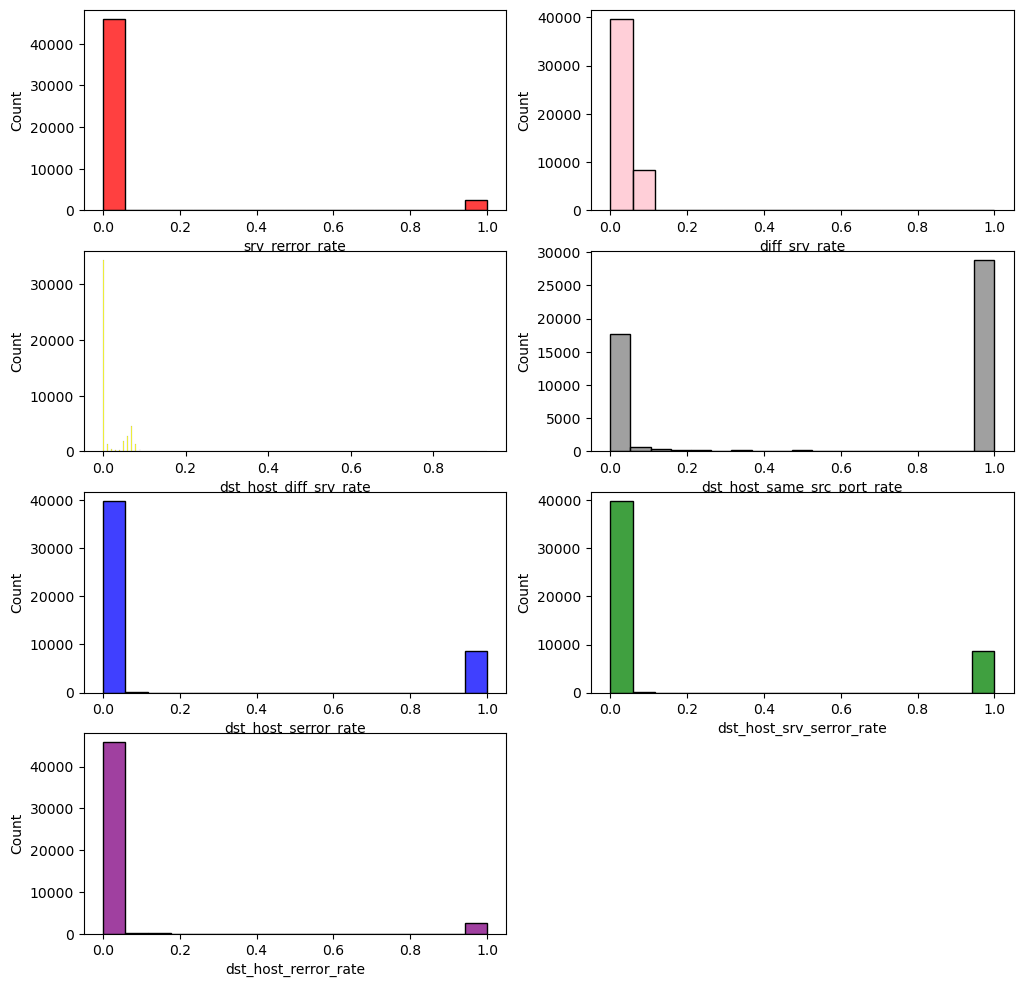

In [15]:
plt.figure(figsize=(12,12))

plt.subplot(4,2,1)
sns.histplot(df_train['srv_rerror_rate'], color = "red")

plt.subplot(4,2,2)
sns.histplot(df_train['diff_srv_rate'], color = "pink")

plt.subplot(4,2,3)
sns.histplot(df_train['dst_host_diff_srv_rate'], color = "yellow")

plt.subplot(4,2,4)
sns.histplot(df_train['dst_host_same_src_port_rate'], color = "gray")

plt.subplot(4,2,5)
sns.histplot(df_train['dst_host_serror_rate'], color = "blue")

plt.subplot(4,2,6)
sns.histplot(df_train['dst_host_srv_serror_rate'], color = "green")

plt.subplot(4,2,7)
sns.histplot(df_train['dst_host_rerror_rate'], color = "purple")

plt.show()

<AxesSubplot:>

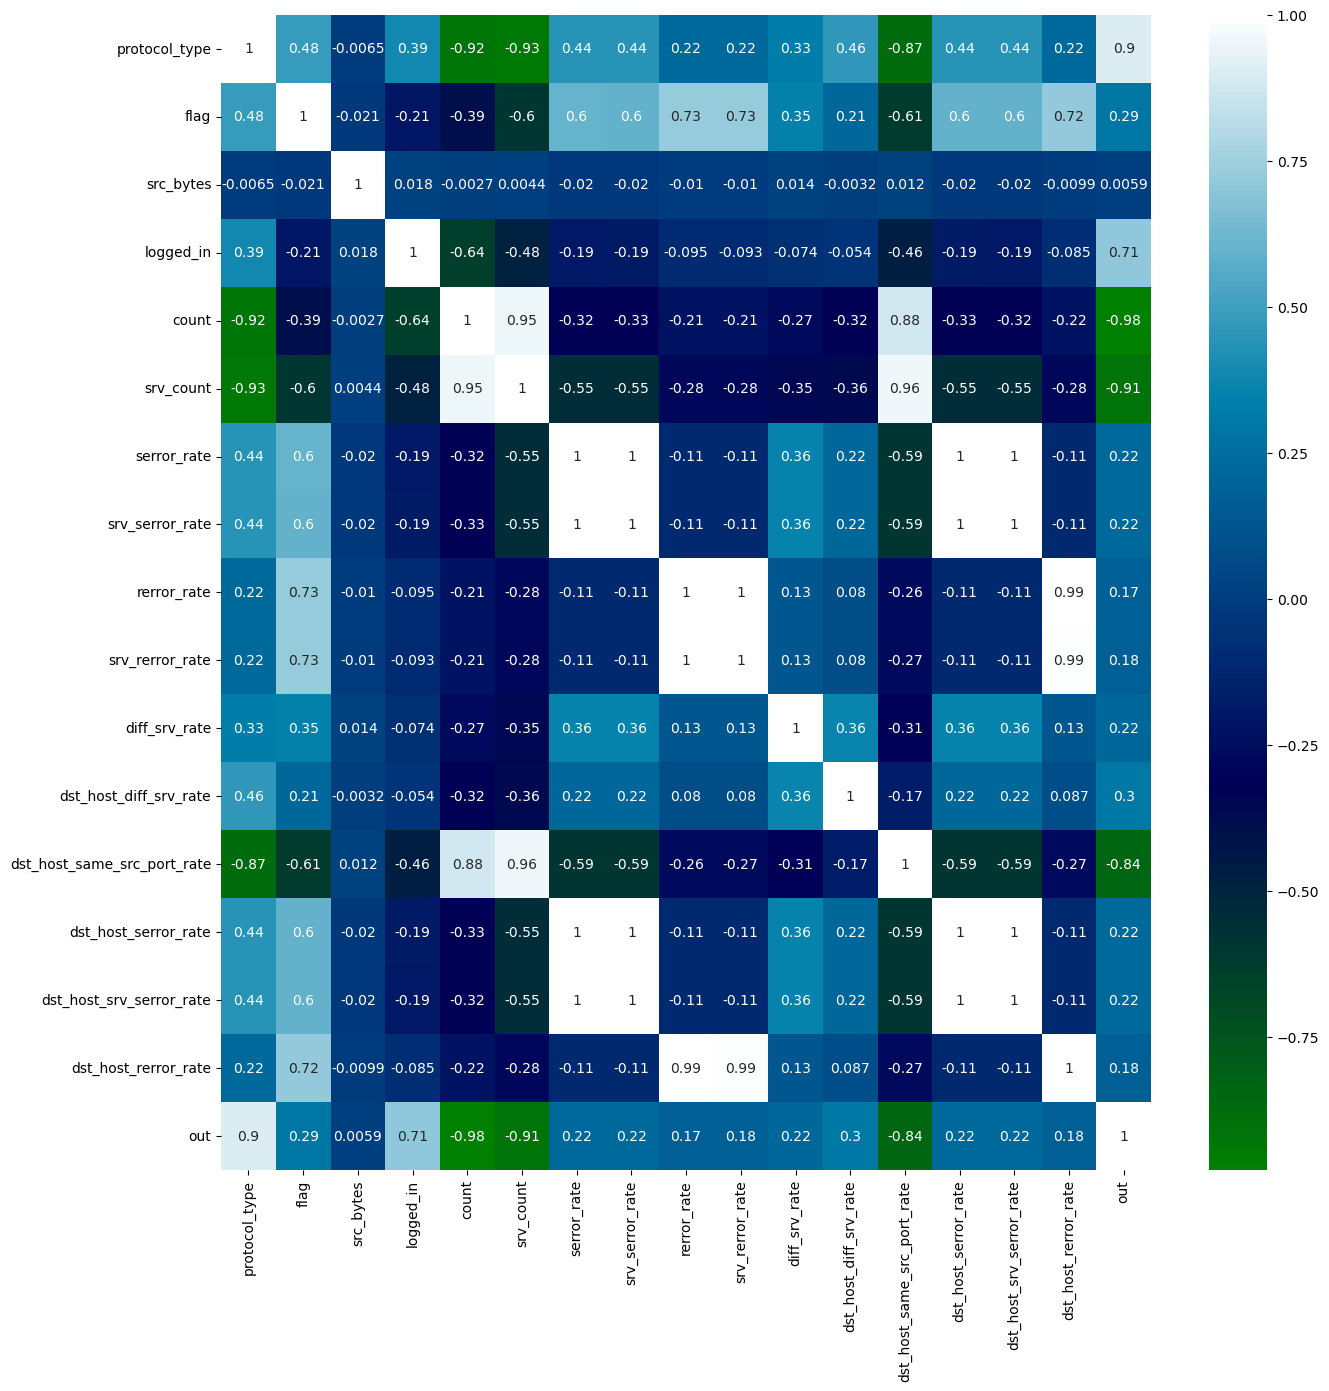

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, cmap = 'ocean')

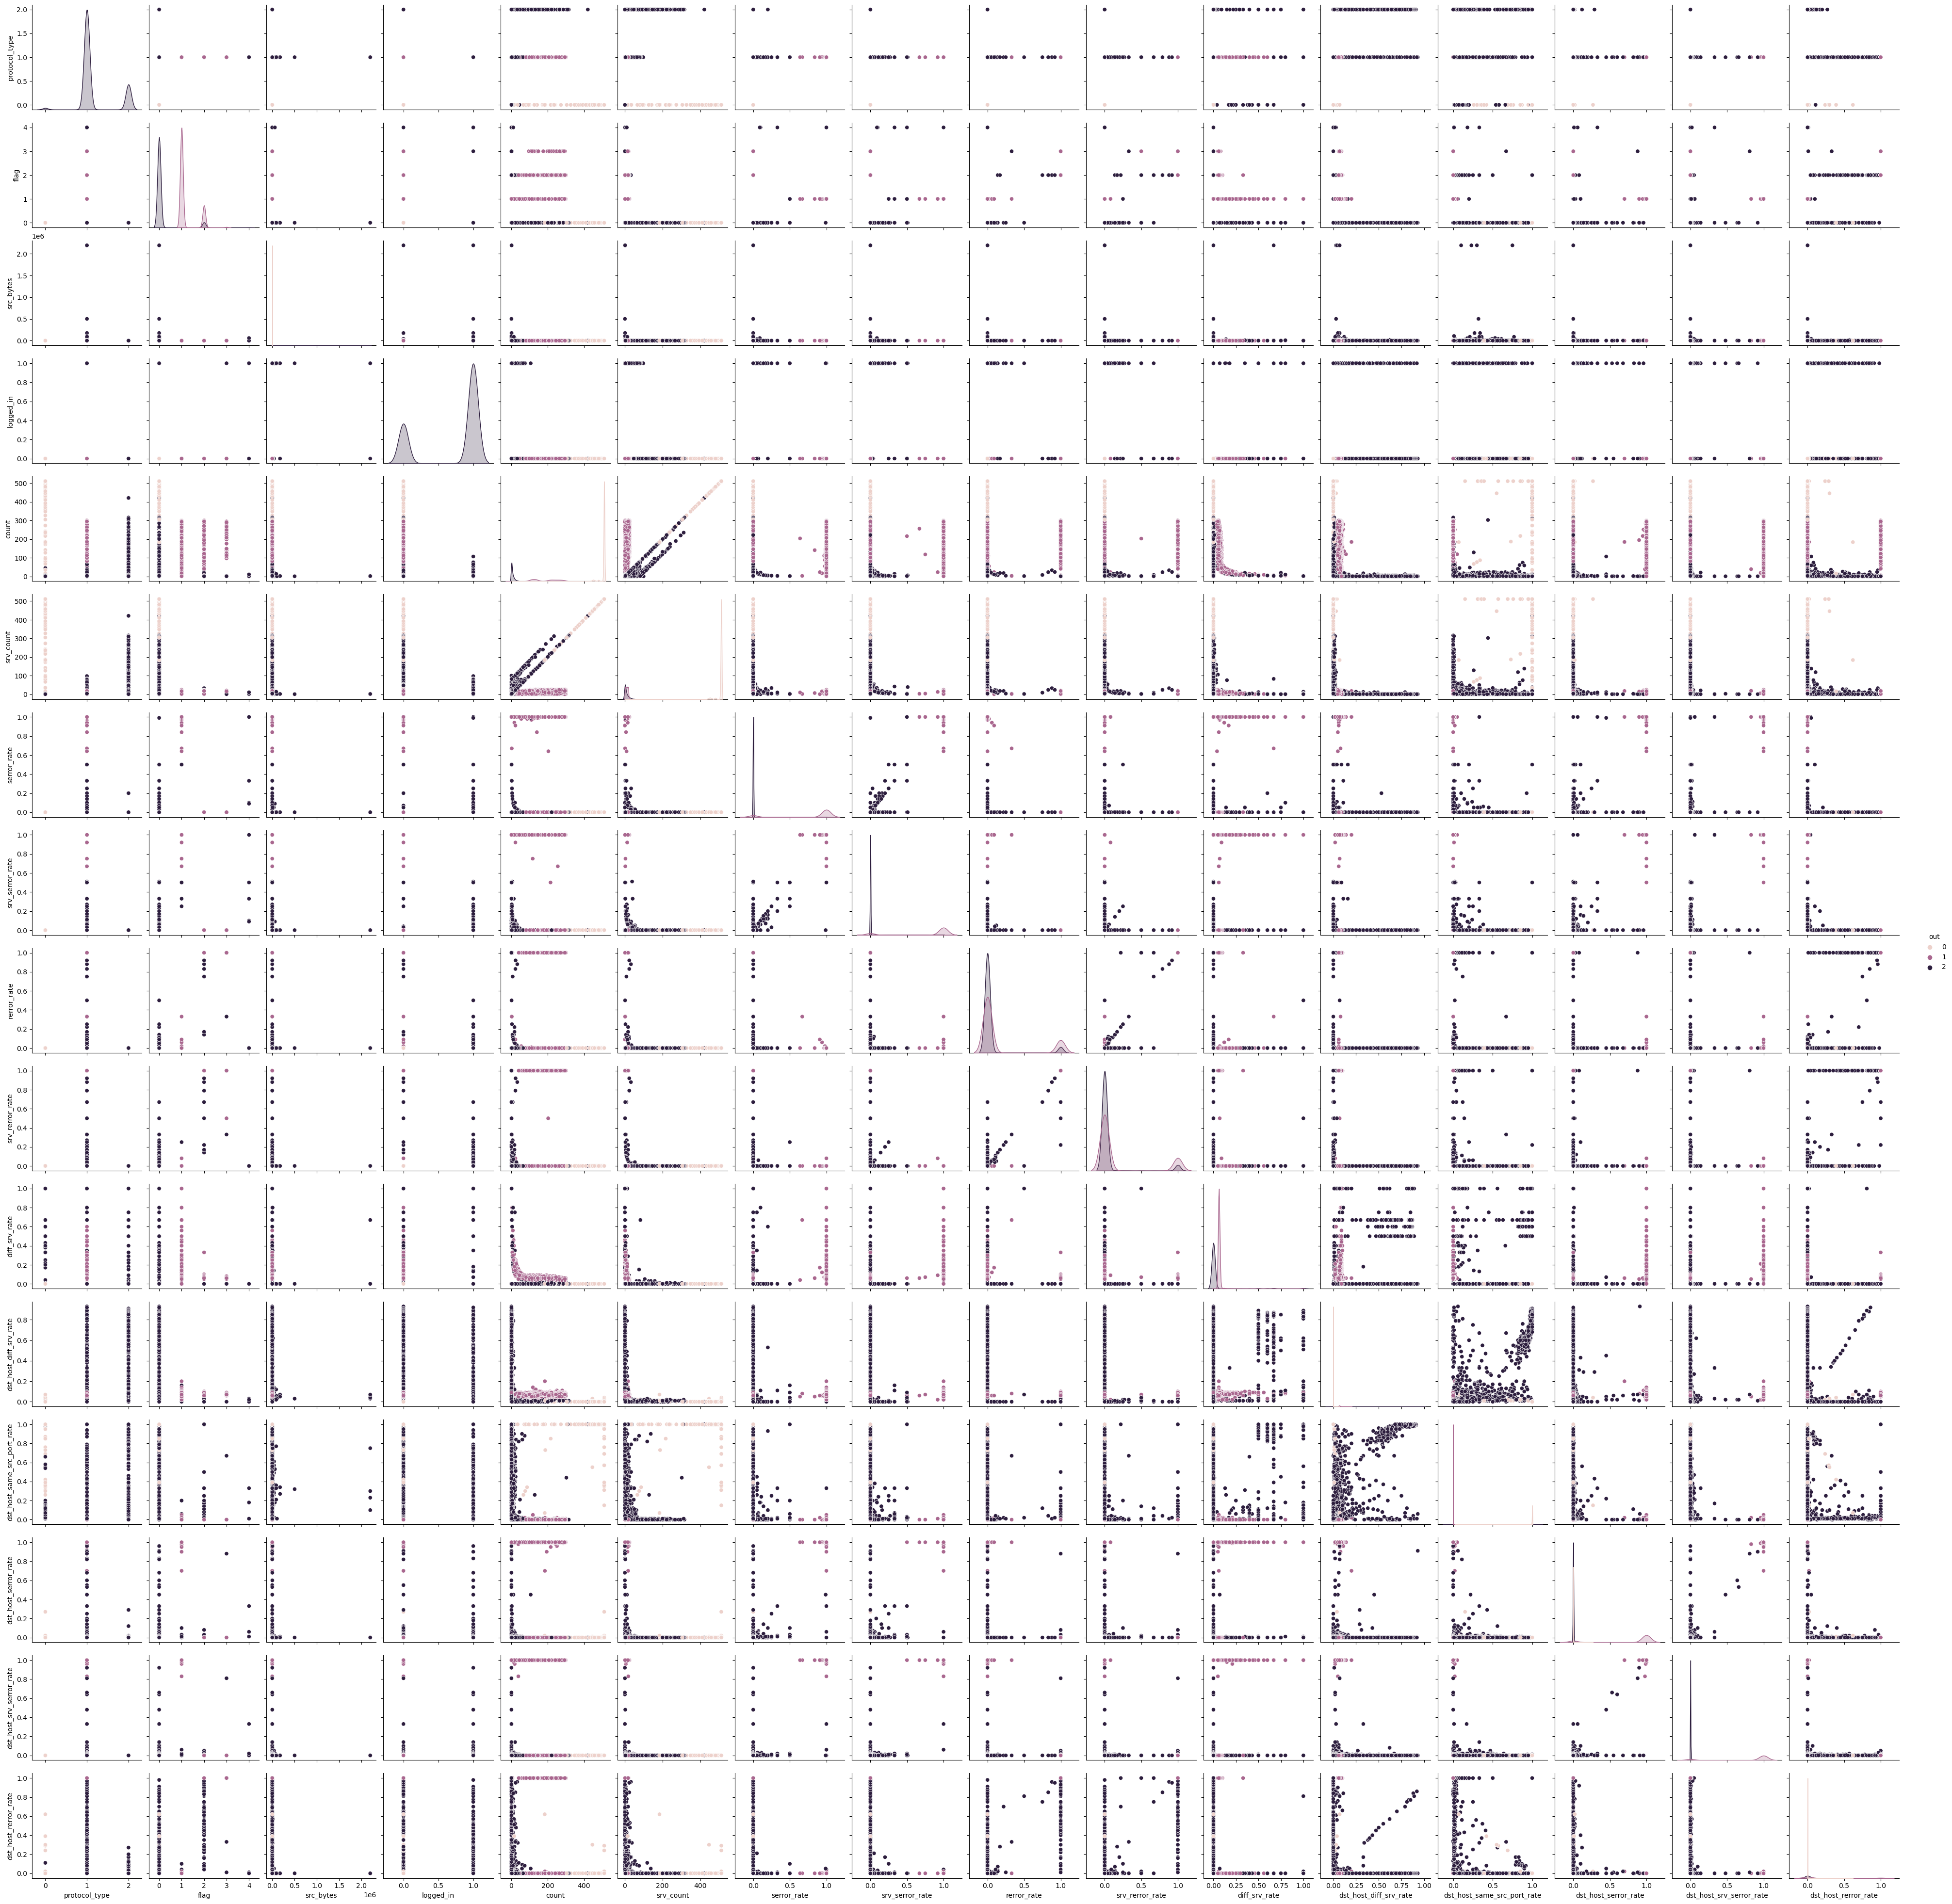

In [18]:
sns.pairplot(df_train, hue = 'out')

## Importing testing data

In [19]:
df_test = pd.read_csv(r"C:\Users\dell\Downloads\teste_sem_rotulo.csv")
df_test.head()

,id,protocol_type,flag,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,48474,icmp,SF,1032,0,511,511,0,0,0,0,0.00,0.00,1.00,0.0,0.0,0
1,48475,tcp,SF,204,1,17,17,0,0,0,0,0.00,0.00,0.02,0.0,0.0,0
2,48476,tcp,S0,0,0,250,8,1,1,0,0,0.06,0.06,0.00,1.0,1.0,0
3,48477,icmp,SF,520,0,511,511,0,0,0,0,0.00,0.00,1.00,0.0,0.0,0
4,48478,icmp,SF,1032,0,511,511,0,0,0,0,0.00,0.00,1.00,0.0,0.0,0


## Exploring testing data

In [20]:
df_test.shape

(60, 17)

In [21]:
df_test.size

1020

In [22]:
df_test.describe()

,id,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,48503.500000,578.100000,0.150000,338.116667,301.266667,0.200000,0.200000,0.016667,0.016667,0.023333,0.040333,0.626833,0.200333,0.200167,0.016667
std,17.464249,441.789416,0.360085,214.426716,247.499075,0.403376,0.403376,0.129099,0.129099,0.088369,0.146761,0.481130,0.403216,0.403294,0.129099
min,48474.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48488.750000,145.750000,0.000000,119.500000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48503.500000,520.000000,0.000000,510.500000,510.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48518.250000,1032.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002500,1.000000,0.000000,0.000000,0.000000
max,48533.000000,1032.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,0.670000,0.850000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           60 non-null     int64  
 1   protocol_type                60 non-null     object 
 2   flag                         60 non-null     object 
 3   src_bytes                    60 non-null     int64  
 4   logged_in                    60 non-null     int64  
 5   count                        60 non-null     int64  
 6   srv_count                    60 non-null     int64  
 7   serror_rate                  60 non-null     int64  
 8   srv_serror_rate              60 non-null     int64  
 9   rerror_rate                  60 non-null     int64  
 10  srv_rerror_rate              60 non-null     int64  
 11  diff_srv_rate                60 non-null     float64
 12  dst_host_diff_srv_rate       60 non-null     float64
 13  dst_host_same_src_port

In [24]:
#checking null values
df_test.isnull().sum()

id                             0
protocol_type                  0
flag                           0
src_bytes                      0
logged_in                      0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
diff_srv_rate                  0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dtype: int64

In [25]:
#checking duplicate values
df_test.duplicated().sum()

0

### Obervation:

Test data size is very small as compared to training dataset. It has 60 rows and 17 columns. It has neither any missing values nor duplicate values. It has two categorical variables, namely, "protocol_type" and "flag". All other variables are numerical in nature.

## Testing data preprocessing

### 1. Changing categorical columns into numerical dtype using replace() function

In [28]:
#protocol_type
df_test['protocol_type'].replace('icmp',0, inplace = True)
df_test['protocol_type'].replace('tcp',1, inplace = True)
df_test['protocol_type'].replace('udp',2, inplace = True)

#flag
df_test['flag'].replace('SF',0, inplace = True)
df_test['flag'].replace('S0',1, inplace = True)
df_test['flag'].replace('REJ',2, inplace = True)
df_test['flag'].replace('RSTO',3, inplace = True)
df_test['flag'].replace('S1',4, inplace = True)

df_test.head(3)

,id,protocol_type,flag,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,48474,0,0,1032,0,511,511,0,0,0,0,0.00,0.00,1.00,0.0,0.0,0
1,48475,1,0,204,1,17,17,0,0,0,0,0.00,0.00,0.02,0.0,0.0,0
2,48476,1,1,0,0,250,8,1,1,0,0,0.06,0.06,0.00,1.0,1.0,0


### 2. Removing unnecessary columns

In [29]:
del df_test["id"]
df_test.head(2)

,protocol_type,flag,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,0,1032,0,511,511,0,0,0,0,0.0,0.0,1.00,0.0,0.0,0
1,1,0,204,1,17,17,0,0,0,0,0.0,0.0,0.02,0.0,0.0,0


## Importing target variable for testing

In [30]:
target = pd.read_csv(r"C:\Users\dell\Downloads\exemplo_submissao.csv")
target.head()

,id,out
0,48474,normal.
1,48475,normal.
2,48476,normal.
3,48477,normal.
4,48478,normal.


### Converting target variable into numerical dtype

In [32]:
target['out'].replace('smurf.',0, inplace = True)
target['out'].replace('neptune.',1, inplace = True)
target['out'].replace('normal.',2, inplace = True)

target.head(3)

,id,out
0,48474,2
1,48475,2
2,48476,2


## Model Building

In [33]:
#defining variables
xtrain = df_train.iloc[:,:-1]
ytrain = df_train["out"]
xtest = df_test
ytest = target["out"]

### 1. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 12)
DTC.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=12)

In [40]:
#prediction
y_pred_gini = DTC.predict(xtest)

In [60]:
#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy score of decision tree model with criterion gini index is ", round(accuracy_score(ytest, y_pred_gini),4))
print("Confusion matrix: \n", confusion_matrix(ytest, y_pred_gini))

Accuracy score of decision tree model with criterion gini index is  0.2167
Confusion matrix: 
 [[ 0  0  0]
 [ 0  0  0]
 [35 12 13]]


In [91]:
#Saving predictions in sample submission file

y_pred_gini_df = pd.DataFrame(y_pred_gini)

y_pred_gini_df.replace(0,'smurf.', inplace = True)
y_pred_gini_df.replace(1,'neptune.', inplace = True)
y_pred_gini_df.replace(2,'normal.', inplace = True)

pdf = y_pred_gini_df.to_csv("Final Submission using Decision Tree 21-6-23.csv", index = False)

pdf = pd.read_csv("Final Submission using Decision Tree 21-6-23.csv")
pdf = pd.concat([target['id'],y_pred_gini_df], axis = 1)
pdf.columns = ["id", "out"]
pdf.to_csv("Final Submission using Decision Tree 21-6-23.csv", index = False)

### 2. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

param_grid = {"n_estimators":[int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
             "max_features":["auto", "sqrt"],
             "max_depth":[2,4],
             "min_samples_split":[2,5],
             "min_samples_leaf":[1,2],
             "bootstrap":[True, False]}

from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

rf_Grid.fit(xtrain, ytrain)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [55]:
print(rf_Grid.best_score_)
print(rf_Grid.best_params_)

0.9999587394914246
{'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 33}


In [56]:
#fitting best parameters into random forest model
rf_Model = RandomForestClassifier(bootstrap= False,
                                  max_depth= 4,
                                  max_features= 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 5,
                                  n_estimators= 33)
rf_Model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_split=5,
                       n_estimators=33)

In [58]:
#prediction
y_pred_rf = rf_Model.predict(xtest)

In [59]:
#evaluation
print("Accuracy score of decision tree model with criterion gini index is ", round(accuracy_score(ytest, y_pred_rf),4)) 
print("Confusion matrix: \n", confusion_matrix(ytest, y_pred_rf))

Accuracy score of decision tree model with criterion gini index is  0.2167
Confusion matrix: 
 [[ 0  0  0]
 [ 0  0  0]
 [35 12 13]]


In [92]:
#Saving predictions in sample submission file

y_pred_rf_df = pd.DataFrame(y_pred_rf)

y_pred_rf_df.replace(0,'smurf.', inplace = True)
y_pred_rf_df.replace(1,'neptune.', inplace = True)
y_pred_rf_df.replace(2,'normal.', inplace = True)

pdf1 = y_pred_rf_df.to_csv("Final Submission using Random Forest 21-6-23.csv", index = False)

pdf1 = pd.read_csv("Final Submission using Random Forest 21-6-23.csv")
pdf1 = pd.concat([target['id'],y_pred_rf_df], axis = 1)
pdf1.columns = ["id", "out"]
pdf1.to_csv("Final Submission using Random Forest 21-6-23.csv", index = False)

### 3. KNN

In [61]:
#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#training data
xtrain_scaled = ss.fit_transform(xtrain)
xtrain_df = pd.DataFrame(xtrain_scaled)
xtrain_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.798185,-0.506874,0.008649,-0.410251,0.822431,0.863967,-0.465998,-0.466245,-0.233661,-0.234297,-0.294953,-0.298825,0.818603,-0.466287,-0.465905,-0.236664
1,0.947773,-0.506874,-0.032474,2.437534,-1.516388,-1.148862,-0.465998,-0.466245,-0.233661,-0.234297,-0.294953,-0.298825,-1.219571,-0.466287,-0.465905,-0.236664
2,0.947773,1.284834,-0.042606,-0.410251,-0.413261,-1.185532,2.148652,2.148668,-0.233661,-0.234297,0.706699,0.402783,-1.261167,2.148425,2.149044,-0.236664
3,-0.798185,-0.506874,-0.016780,-0.410251,0.822431,0.863967,-0.465998,-0.466245,-0.233661,-0.234297,-0.294953,-0.298825,0.818603,-0.466287,-0.465905,-0.236664
4,-0.798185,-0.506874,0.008649,-0.410251,0.822431,0.863967,-0.465998,-0.466245,-0.233661,-0.234297,-0.294953,-0.298825,0.818603,-0.466287,-0.465905,-0.236664


In [62]:
#testing data
xtest_scaled = ss.fit_transform(xtest)
xtest_df = pd.DataFrame(xtest_scaled)
xtest_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.790066,-0.506502,1.036083,-0.420084,0.813062,0.854562,-0.5,-0.5,-0.130189,-0.130189,-0.266273,-0.277142,0.782149,-0.501032,-0.500518,-0.130189
1,0.902932,-0.506502,-0.853930,2.380476,-1.510197,-1.158249,-0.5,-0.5,-0.130189,-0.130189,-0.266273,-0.277142,-1.271910,-0.501032,-0.500518,-0.130189
2,0.902932,1.664222,-1.319585,-0.420084,-0.414409,-1.194920,2.0,2.0,-0.130189,-0.130189,0.418429,0.135135,-1.313829,1.999959,1.999990,-0.130189
3,-0.790066,-0.506502,-0.132620,-0.420084,0.813062,0.854562,-0.5,-0.5,-0.130189,-0.130189,-0.266273,-0.277142,0.782149,-0.501032,-0.500518,-0.130189
4,-0.790066,-0.506502,1.036083,-0.420084,0.813062,0.854562,-0.5,-0.5,-0.130189,-0.130189,-0.266273,-0.277142,0.782149,-0.501032,-0.500518,-0.130189


In [63]:
from sklearn.neighbors import KNeighborsClassifier

err_rate = []
for i in range (1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_df, ytrain)
    i_pred = knn.predict(xtest_df)
    err_rate.append(np.mean(i_pred != ytest))

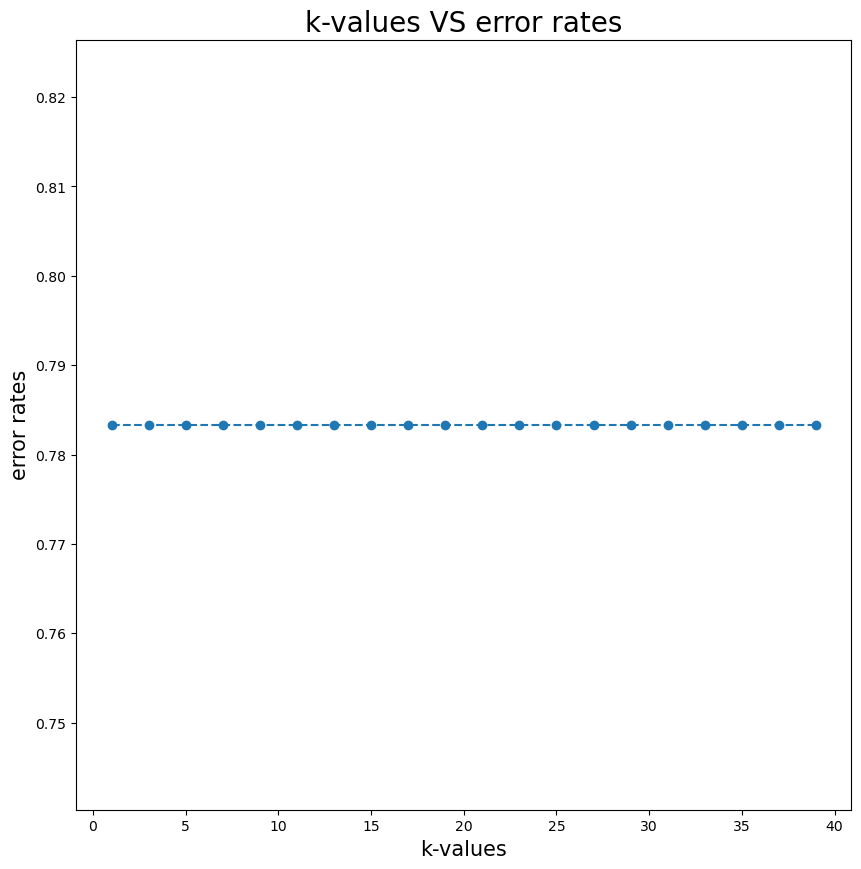

In [64]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40,2), err_rate, linestyle = "dashed", marker = "o")
plt.title("k-values VS error rates", fontsize =20)
plt.xlabel("k-values",fontsize =15)
plt.ylabel("error rates",fontsize =15)
plt.show()

In [65]:
#using GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50,2)}
knn_gd = GridSearchCV(knn,param_grid,cv=5)
knn_gd.fit(xtrain_df,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=39),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [66]:
print(knn_gd.best_score_)
print(knn_gd.best_params_)

nan
{'n_neighbors': 1}


In [67]:
#fitting best parameters into model
knn_best = KNeighborsClassifier(n_neighbors=1)
knn_best.fit(xtrain_df, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [68]:
#prediction 
pred = knn.predict(xtest_df)

In [69]:
#evaluation
accuracy_score(ytest, pred)

0.21666666666666667

In [93]:
#Saving predictions in sample submission file

pred_df = pd.DataFrame(pred)

pred_df.replace(0,'smurf.', inplace = True)
pred_df.replace(1,'neptune.', inplace = True)
pred_df.replace(2,'normal.', inplace = True)

pdf2 = pred_df.to_csv("Final Submission using KNN 21-6-23.csv", index = False)

pdf2 = pd.read_csv("Final Submission using KNN 21-6-23.csv")
pdf2 = pd.concat([target['id'],pred_df], axis = 1)
pdf2.columns = ["id", "out"]
pdf2.to_csv("Final Submission using KNN 21-6-23.csv", index = False)

### 4. Ada Boost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = DTC)

parameters = {"n_estimators":[50,70,90,120,180,200], "learning_rate":[0.001,0.01,0.1,1,10], "algorithm":["SAMME","SAMME.R"]}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(xtrain_df, ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                random_state=12)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [71]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 180}
0.9999793708096958


In [72]:
#fitting best parameters into model
ada = AdaBoostClassifier(base_estimator = DTC,algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 180)
ada.fit(xtrain_df,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=12),
                   learning_rate=0.1, n_estimators=180)

In [73]:
#prediction
y_pred_ada = ada.predict(xtest_df)

In [74]:
#evaluation
accuracy_score(ytest, y_pred_ada)

0.21666666666666667

In [94]:
#Saving predictions in sample submission file

y_pred_ada_df = pd.DataFrame(y_pred_ada)

y_pred_ada_df.replace(0,'smurf.', inplace = True)
y_pred_ada_df.replace(1,'neptune.', inplace = True)
y_pred_ada_df.replace(2,'normal.', inplace = True)

pdf3 = y_pred_ada_df.to_csv("Final Submission using adaboost classifier 21-6-23.csv", index = False)

pdf3 = pd.read_csv("Final Submission using adaboost classifier 21-6-23.csv")
pdf3 = pd.concat([target['id'],y_pred_ada_df], axis = 1)
pdf3.columns = ["id", "out"]
pdf3.to_csv("Final Submission using adaboost classifier 21-6-23.csv", index = False)

### 5. Gradient Boosting Classifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

parameters = {'loss': ['deviance', 'exponential'],'learning_rate': [0.001, 0.1, 1, 10],'n_estimators': [100, 150, 180, 200]}

gd_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
gd_search.fit(xtrain_df,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [76]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 180}
0.9999793708096958


In [80]:
#fitting best parameters into model
gb1 = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 180)
gb1.fit(xtrain_df,ytrain)

GradientBoostingClassifier(n_estimators=180)

In [81]:
#prediction
y_pred_gb = gb1.predict(xtest_df)

In [82]:
#evaluation
accuracy_score(ytest, y_pred_gb)

0.21666666666666667

In [95]:
#Saving predictions in sample submission file

y_pred_gb_df = pd.DataFrame(y_pred_gb)

y_pred_gb_df.replace(0,'smurf.', inplace = True)
y_pred_gb_df.replace(1,'neptune.', inplace = True)
y_pred_gb_df.replace(2,'normal.', inplace = True)

pdf4 = y_pred_gb_df.to_csv("Final Submission using gradient boosting classifier 21-6-23.csv", index = False)

pdf4 = pd.read_csv("Final Submission using gradient boosting classifier 21-6-23.csv")
pdf4 = pd.concat([target['id'],y_pred_gb_df], axis = 1)
pdf4.columns = ["id", "out"]
pdf4.to_csv("Final Submission using gradient boosting classifier 21-6-23.csv", index = False)

### 6. SVM

In [83]:
from sklearn.svm import SVC
classifier = SVC()

parameters = [{"C":[1,10,100,1000],
              "kernel":["sigmoid", "rbf","poly"],
              "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

gd_svm = GridSearchCV(estimator = classifier,
                 param_grid = parameters,
                 scoring = "accuracy", #we are using accuracy since data is balanced
                 cv = 10,
                 n_jobs = -1)

gd_svm.fit(xtrain_df, ytrain)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid', 'rbf', 'poly']}],
             scoring='accuracy')

In [84]:
print(gd_svm.best_params_)
print(gd_svm.best_score_)

{'C': 1, 'gamma': 0.3, 'kernel': 'poly'}
0.9998968476639287


In [86]:
#fitting best parameters into model
clf = SVC(C= 1, gamma= 0.3, kernel= 'poly')
clf.fit(xtrain_df, ytrain)

SVC(C=1, gamma=0.3, kernel='poly')

In [87]:
#prediction
y_pred_svm = clf.predict(xtest_df)

In [88]:
#evaluation
accuracy_score(ytest, y_pred_svm)

0.2

In [97]:
#Saving predictions in sample submission file

y_pred_svm_df = pd.DataFrame(y_pred_svm)

y_pred_svm_df.replace(0,'smurf.', inplace = True)
y_pred_svm_df.replace(1,'neptune.', inplace = True)
y_pred_svm_df.replace(2,'normal.', inplace = True)

pdf5 = y_pred_svm_df.to_csv("Final Submission using SVM 21-6-23.csv", index = False)

pdf5 = pd.read_csv("Final Submission using SVM 21-6-23.csv")
pdf5 = pd.concat([target['id'],y_pred_svm_df], axis = 1)
pdf5.columns = ["id", "out"]
pdf5.to_csv("Final Submission using SVM 21-6-23.csv", index = False)

## Reference

https://www.kaggle.com/competitions/bimaster-bi-dm-puc-rio-detecao-de-intrusao-de-rede/data